# 1. EEGNet para Clasificación de Imaginación Motora



### ¿Qué es EEGNet?
- **EEGNet** es una arquitectura de red neuronal convolucional (CNN) diseñada específicamente para trabajar con **señales EEG**.
- Se utiliza en **BCIs (Brain-Computer Interfaces)** para reconocer patrones cerebrales asociados a diferentes tareas.

### ¿Qué hace este proyecto?
- Implementa un **modelo CNN basado en EEGNet**.
- El objetivo es **clasificar tareas de imaginación motora** (cuando una persona imagina mover una parte del cuerpo sin moverla realmente).

### Clases que clasifica:
1. **Mano Izquierda (Left Hand)**
2. **Mano Derecha (Right Hand)**
3. **Pie (Foot)**
4. **Lengua (Tongue)**

### ¿Cómo funciona?
1. **Entrada**: señales EEG recogidas de varios electrodos colocados en el cuero cabelludo.
2. **Preprocesamiento**: filtrado y segmentación de las señales en ventanas temporales.
3. **EEGNet**:
   - **Convoluciones temporales** → capturan patrones en el tiempo (ritmos cerebrales).
   - **Convoluciones espaciales** → combinan información de distintos electrodos.
   - **Bloques de regularización (Dropout, BatchNorm)** → evitan sobreajuste.
   - **Clasificador final (Dense + Softmax)** → asigna la señal a una de las 4 clases.
4. **Salida**: Probabilidad de que la señal corresponda a *mano izquierda, mano derecha, pie o lengua*.

### Aplicación
- Usado en sistemas **BCI** para controlar dispositivos mediante el pensamiento.
- Importante en **rehabilitación motora** y **neurotecnología**.


## 1.1 Paper: EEGNet: A Compact Convolutional Neural Network for EEG-based Brain-Computer Interfaces



### 🔹 Objetivo
Un Brain-Computer Interface (BCI) permite comunicarse con una computadora usando la actividad cerebral (EEG). Normalmente, cada tipo de BCI (ejemplo: mover una mano imaginariamente, ver un estímulo visual, etc.) necesita un modelo específico con extractores de características y clasificadores diseñados para ese tipo de señal.
El problema es que estos modelos no se generalizan bien a **otros tipos de señales (DIFERENTES PARADIGMAS)**.

### 🔹 Propuesta
Los autores presentan EEGNet, una red neuronal convolucional (CNN) diseñada específicamente para EEG.

Usa convoluciones depthwise y separables → esto hace que sea más compacta (menos parámetros) y al mismo tiempo capture patrones propios del EEG.

Está pensada para funcionar en distintos tipos de BCI, no solo en uno.

### 🔹 Enfoque
Compararon EEGNet en 4 paradigmas de BCI:

- P300 → potencial visual evocado.

- ERN (Error-Related Negativity) → respuesta cerebral a errores.

- MRCP (Movement-Related Cortical Potentials) → potenciales relacionados al movimiento.

- SMR (Sensory Motor Rhythms) → ritmos motores usados en imaginación motora (MI).

La prueba fue tanto within-subject (entrenar y probar en la misma persona) como cross-subject (entrenar en algunos sujetos y probar en otros).

### 🔹 Resultados

EEGNet tiene buen rendimiento incluso con pocos datos de entrenamiento.

Funciona bien tanto en señales ERP (eventos, como P300 y ERN) como en señales oscilatorias (ritmos motores SMR).

Generaliza mejor que los algoritmos de referencia en distintos paradigmas.

Además, los autores muestran cómo visualizar lo que la red está aprendiendo → esto ayuda a interpretar las características que detecta.

#### 🔹 Importancia
EEGNet no solo es eficiente y compacta, sino que también aprende características cerebrales interpretables y no depende de artefactos o ruido. Esto lo hace un modelo muy prometedor para múltiples aplicaciones de BCI.

# 2. Materials and Methods

## 2.1 Data desciption

#### Comparación de tipos de BCI

Los **BCI (Brain-Computer Interfaces)** pueden clasificarse según la característica del EEG que utilizan: **potenciales relacionados con eventos (ERP)** o **señales oscilatorias**.  

- Los **ERP** detectan respuestas de alta amplitud y baja frecuencia ante un estímulo externo conocido y sincronizado en el tiempo. 

- Las **señales oscilatorias** usan la potencia de bandas específicas del EEG y suelen ser asincrónicas, aunque se pueden analizar como ERSP si se sincronizan con un estímulo.

A continuación se muestra la comparación de sus características principales:

| Característica | BCI ERP (Event-Related Potential) | BCI Oscillatory |
|----------------|---------------------------------|----------------|
| Señal usada | Potenciales evocados por eventos externos | Potencia de bandas de frecuencia EEG específicas |
| Sincronización | Generalmente **time-locked** a un estímulo externo | Generalmente **asincrónicos**; se pueden analizar como ERSP si están sincronizados |
| Robustez | Alta, formas de onda bien estereotipadas | Menor, debido a baja relación señal/ruido (SNR) y mayor variabilidad entre sujetos |
| Facilidad de entrenamiento | Más fácil de entrenar | Más difícil de entrenar |
| Ejemplos de paradigmas | P300, ERN, MRCP (parcial) | SMR, MRCP (parcial) |

---

#### Resumen de los datasets usados

| Paradigma | Tipo de característica | Filtro bandpass | # Sujetos | Ensayos por sujeto | # Clases | Desequilibrio de clases |
|-----------|----------------------|----------------|-----------|------------------|----------|------------------------|
| P300      | ERP                  | 1–40 Hz        | 15        | ∼2000            | 2        | Sí, ∼5.6:1            |
| ERN   (Error-Related Negativity)    | ERP                  | 1–40 Hz        | 26        | 340              | 2        | Sí, ∼3.4:1            |
| MRCP  (Movement-Related Cortical Potential)     | ERP/Oscillatory      | 0.1–40 Hz      | 13        | ∼1100            | 2        | No                     |
| SMR  (Sensory Motor Rhythm)     | Oscillatory          | 4–40 Hz        | 9         | 288              | 4        | No                     |


## 2.1.2 Dataset 4: SMR (Sensory Motor Rhythm)

El **Dataset 4: SMR** está diseñado para BCIs basados en **movimiento imaginado (motor imagery)**.  

En este tipo de BCI, los pacientes no realizan el movimiento físicamente, sino que lo **imaginan**, y el EEG detecta patrones de desincronización en las bandas **mu (8–12 Hz)** y **beta (18–26 Hz)** en la corteza sensoriomotora.

### Oscilaciones Sensorimotoras (Sensorimotor Oscillations)

- Las **redes neuronales** tienden a generar **actividad oscilatoria**.  
- Algunos ritmos cerebrales son muy conocidos, como el **ritmo alfa occipital**, que:  
  - Aumenta al **cerrar los ojos y relajarse**.  
  - Disminuye al **estar alerta**.  


#### - Ritmos mu y beta en áreas sensorimotoras
- Las áreas **sensorimotoras** tienen sus propios ritmos:  
  - **Mu:** 8–12 Hz  
  - **Beta:** 12–30 Hz  
- Estos ritmos aparecen principalmente cuando la **área está en estado de reposo** (idle state).  

#### - Desincronización y sincronización relacionada con eventos
- Cuando ocurre **actividad motora**:  
  - Las áreas cerebrales correspondientes dejan su estado oscilatorio de reposo.  
  - Se **preparan y ejecutan movimientos**, lo que provoca:  
    - **Desincronización relacionada con eventos (ERD, Event-Related Desynchronization)** → disminución de la potencia en las bandas mu y beta.  
    - **Sincronización relacionada con eventos (ERS, Event-Related Synchronization)** → efecto contrario.  
- Estos efectos son **locales**, afectando solo la región específica del cerebro relacionada con la acción, y en **bandas de frecuencia específicas**.  

---

#### Imaginación motora (Motor Imagery)
- No solo los **movimientos reales** causan ERD y ERS.  
- La **imaginación de un movimiento** también provoca patrones similares en el cerebro.  
  - Ejemplo: imaginar mover la mano genera un ERD en la región sensorimotora correspondiente.  
- Esta propiedad es utilizada por los **BCI (Brain-Computer Interfaces)**:  
  - Permiten **diferenciar movimientos imaginados de diferentes partes del cuerpo**.  
  - Esto es útil cuando el usuario **no realiza movimientos reales**, pero el BCI aún puede interpretar sus intenciones mediante la imaginación motora.

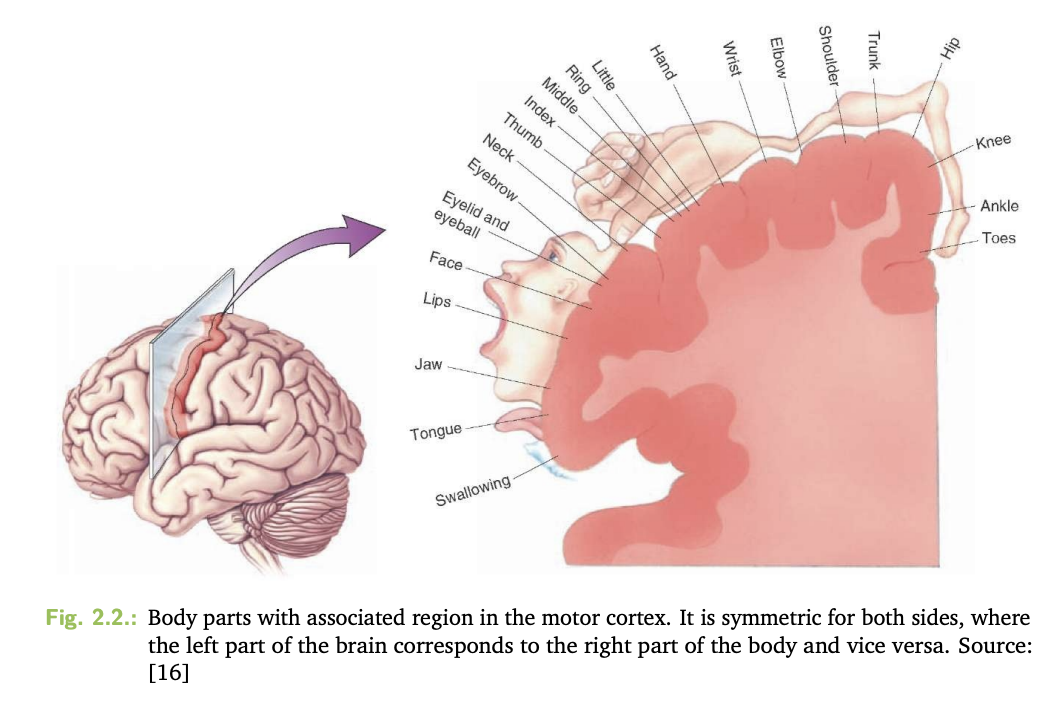
#### Relevancia para rehabilitación motora post-stroke

- Después de un accidente cerebrovascular, muchos pacientes no pueden mover ciertas extremidades.  

- Entrenar el cerebro a través de **movimiento imaginado** ayuda a **reactivar las áreas motoras**, promoviendo recuperación.  

- El SMR captura los cambios eléctricos asociados a la imaginación del movimiento, sirviendo como **señal de control** para **neurofeedback** o **interfaces BCI**.

---

#### Características del dataset

- Movimientos imaginados de **manos izquierda/derecha, pies y lengua** → útil para entrenar modelos de BCI que detecten distintas acciones motoras.  

- EEG grabado con **22 electrodos**, muestreo a **250 Hz**, filtrado entre **0.5–100 Hz** y luego resampleado a **128 Hz**.  

- Segmentos temporales seleccionados de **0.5 a 2.5 s** tras la señal de inicio (**cue**) → momento donde el cerebro genera la señal de motor imagery. 
 
- **Tarea:** clasificación de **4 clases**, usando **precisión** como medida de desempeño.

---

#### Resumen práctico

El SMR es el **dataset ideal** para tu proyecto porque:

1. Trabaja con **movimiento imaginado**, que es exactamente lo que se usa en rehabilitación post-stroke.  
2. Permite diferenciar varios tipos de movimientos, ayudando a entrenar un **BCI más preciso**.  
3. Es un dataset **estandarizado y bien documentado**, facilitando el entrenamiento de modelos como **EEGNet**.


## 2.2.1 EEGNet: Compact CNN Architecture

EEGNet es una **arquitectura compacta de CNN** para BCIs basadas en EEG, diseñada para:

1. Ser aplicable a **varios paradigmas de BCI**.  
2. Entrenarse con **datos limitados**.  
3. Producir **características neurofisiológicamente interpretables**.

**Características del entrenamiento:**

- Datos: EEG con **C canales**, **T muestras temporales**, muestreo a **128 Hz**.  
- Optimizador: **Adam** con parámetros por defecto.  
- Función de pérdida: **categorical cross-entropy**.  
- Iteraciones: **500 epochs** con **early stopping**, guardando los pesos con menor pérdida en el set de validación.  
- Hardware: NVIDIA Quadro M6000 GPU, **CUDA 9**, **cuDNN v7**.  
- Framework: **TensorFlow + Keras API**.  
- Observación: **No se usan bias units** en las capas convolucionales.  
- Nota: aunque las convoluciones son unidimensionales, se usan funciones 2D por simplicidad en la implementación.

**Código disponible en:** [EEGNet GitHub](https://github.com/vlawhern/arl-eegmodels)

La arquitectura se divide en tres bloques principales: **Bloque 1 (convoluciones temporales y depthwise)**, **Bloque 2 (separable convolutions)** y **Bloque 3 (de clasificación)**.

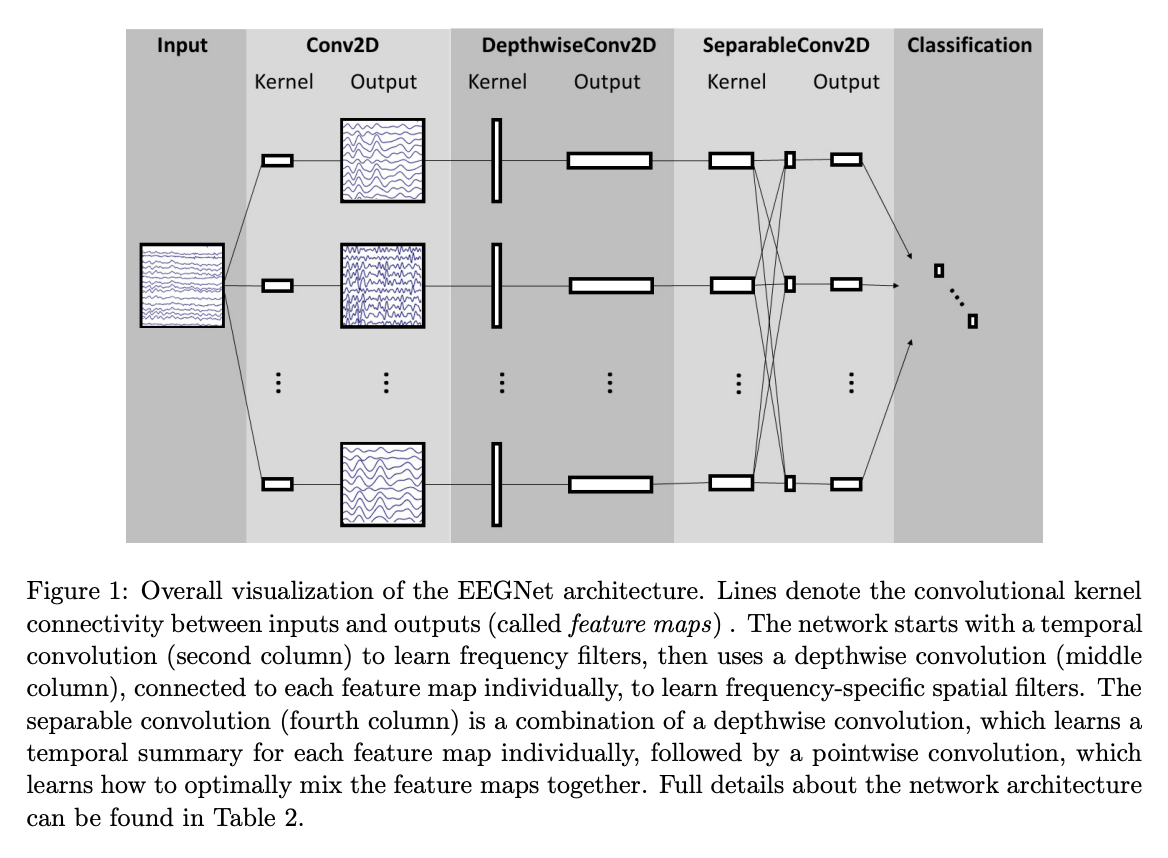

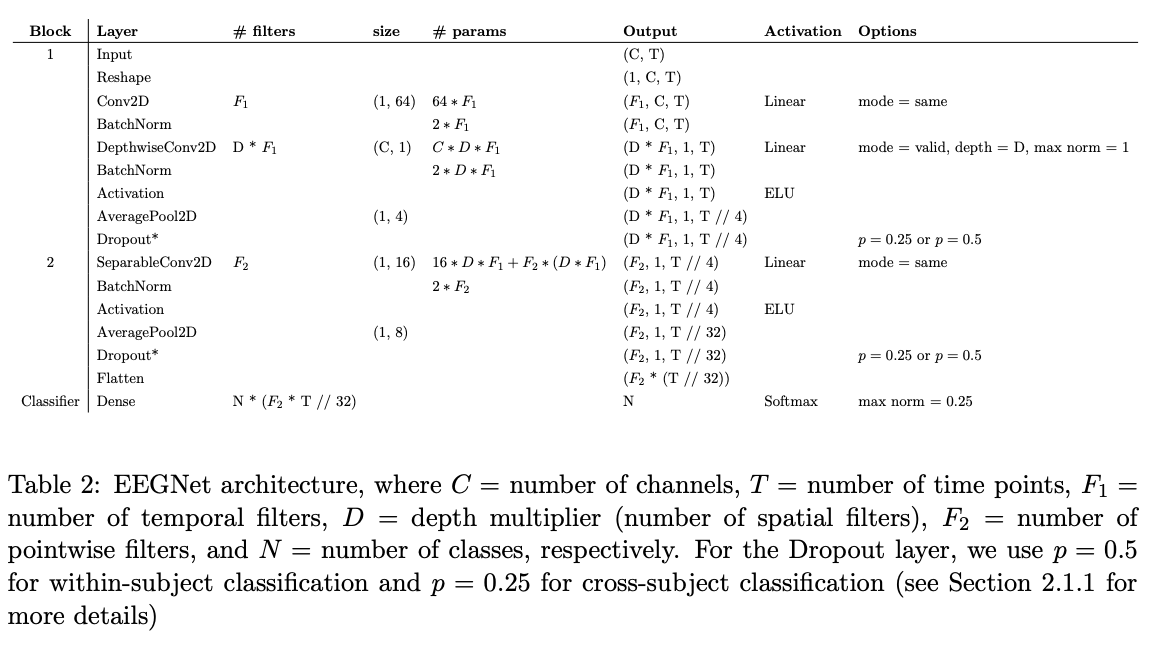

### 1. Input: Datos EEG
- **Dimensiones:** `(C, T)`  
  - `C` = número de canales/electrodos (ej. 22)  
  - `T` = número de puntos de tiempo por trial (ej. 256 muestras)  
- **Señal:** Cruza el tiempo y los electrodos. Cada canal es como un sensor que registra la actividad cerebral.
- **Formato:** Raw EEG (no filtrado en EEGNet, aunque algunos preprocesamientos básicos como normalización son útiles).
---
- `F1`: número de filtros temporales (detecta ritmos EEG)  
- `D`: número de filtros espaciales por filtro temporal (localización)  
- `F2`: número de filtros pointwise en Bloque 2 (combinación de mapas)  
  - `F2 < D*F1` → representación comprimida  
  - `F2 > D*F1` → representación sobredimensionada  
- Ejemplo: `EEGNet-4,2` → 4 filtros temporales × 2 filtros espaciales → 8 mapas de características en Bloque 1
---

### 2. Bloque 1: Convoluciones temporales y espaciales

**Objetivo:** Extraer patrones de frecuencia (temporal) y su localización en el cuero cabelludo (espacial).

1. **Convolución temporal (Conv2D)**
   - F1 filtros 2D de tamaño `(1, 64)`  
   - Cada filtro detecta un tipo de ritmo (p. ej., mu o beta).  
   - Output: `F1` mapas de características temporales `(F1, T')`

2. **Convolucion espacial (DepthwiseConv2D)**
   - Cada filtro temporal se combina con D filtros espaciales `(C,1)`  
   - Aprende cómo se distribuye la señal en los electrodos.  
   - Output: `F1 × D` mapas de características espaciales `(F1*D, T')`

3. **Batch Normalization + ELU**
   - Normaliza la activación y aplica no linealidad suave.

4. **Dropout**
   - p=0.5 para dentro de sujeto, p=0.25 para cross-subject  
   - Ayuda a regularizar y evitar sobreajuste.

5. **Average Pooling `(1,4)`**
   - Reduce la cantidad de muestras temporales, simplificando los datos.
   - Output: `(F1*D, T'/4)`

---

### 3. Bloque 2: Convolución Separable

**Objetivo:** Resumir la información temporal y combinar mapas de características.

1. **Depthwise temporal `(1,16)`**
   - Resume 500 ms de EEG para cada mapa individual.
   - Output: `F1*D` mapas resumidos.

2. **Pointwise convolution `(F2,1x1)`**
   - Combina los mapas resumidos para crear nuevas representaciones.  
   - Output: `F2` mapas combinados.

3. **Average Pooling `(1,8)`**
   - Reduce aún más las dimensiones temporales.  
   - Output: `F2, T''` (T'' << T)

---

### 4. Bloque 3: Clasificación

- Las características procesadas se pasan **directamente a softmax** con N unidades.  
  - N = número de clases (ej. izquierda, derecha, pies, lengua → N=4)
- No se utiliza capa densa intermedia: menos parámetros, más simple.

**Output final:**  
- Probabilidades de cada clase para cada trial EEG.  
- Ejemplo: `[0.05, 0.70, 0.10, 0.15]` → clase más probable = 2 (derecha).

---


# 3. Data extracting and .gdf manipulation

## 3.1 Descripcion de la base de datos

Link: https://www.bbci.de/competition/iv/desc_2a.pdf


La base de datos consiste en **registros de EEG de 9 sujetos**. Se utilizó un **paradigma BCI basado en señales de cue (señal de aviso)** con **cuatro tareas de imaginación motora**:

1. **Imaginación de movimiento de la mano izquierda (Clase 1)**
2. **Imaginación de movimiento de la mano derecha (Clase 2)**
3. **Imaginación de movimiento de ambos pies (Clase 3)**
4. **Imaginación de movimiento de la lengua (Clase 4)**

Cada sujeto realizó **dos sesiones en días distintos**, y cada sesión comprendió **6 runs** separados por breves descansos.  

- **Un run** contiene **48 ensayos** (12 por cada clase), lo que da un total de **288 ensayos por sesión**.

### Registro de Artefactos EOG
Al inicio de cada sesión se realizó un **registro de aproximadamente 5 minutos** para estimar la influencia de artefactos por movimientos oculares (**EOG**), dividido en 3 bloques:

1. **Ojos abiertos (2 minutos):** Mirando una **cruz de fijación** en la pantalla.  
2. **Ojos cerrados (1 minuto)**  
3. **Movimientos oculares (1 minuto)**  

> Nota: Debido a problemas técnicos, el bloque de EOG es más corto para el sujeto **A04T**, conteniendo solo la condición de movimientos oculares (ver Tabla 1 para la lista de sujetos).

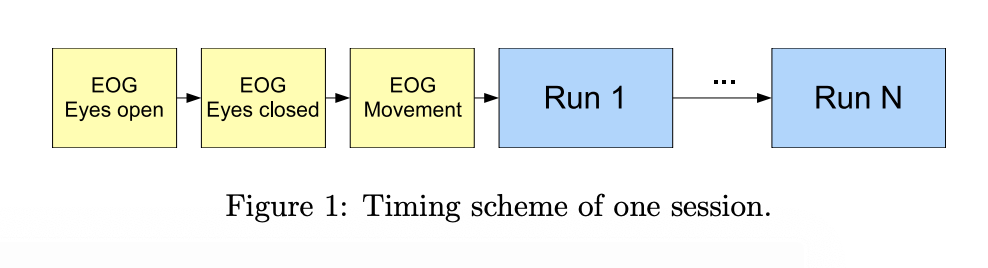

### Secuencia de un Ensayo
1. **t = 0 s:** Aparece una cruz de fijación en la pantalla y se emite un **tono de advertencia corto**.  

2. **t = 2 s:** Aparece una **flecha como cue**, apuntando hacia izquierda, derecha, abajo o arriba, indicando la tarea de imaginación motora correspondiente. La flecha se mantiene visible por **1.25 s**.  

3. **t = 2–6 s:** El sujeto realiza la tarea de imaginación motora indicada **sin recibir retroalimentación**.
  
4. **t = 6 s:** La cruz de fijación desaparece y se produce un **breve descanso** con la pantalla en negro antes del siguiente ensayo.  

> Este paradigma está ilustrado en la Figura 2 del estudio original.

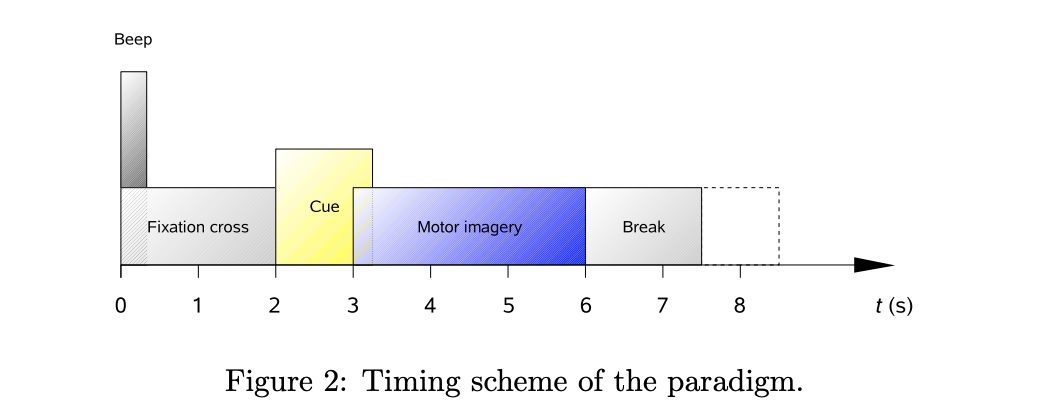

### Registro de Datos EEG

- Se utilizaron **22 electrodos Ag/AgCl** con **distancia interelectrodos de 3.5 cm** (ver Figura 3 izquierda).  
- Los registros fueron **monopolares**, con el **mastoide izquierdo como referencia** y el **mastoide derecho como tierra**.  

- **Frecuencia de muestreo:** 250 Hz  
- **Filtro paso-banda:** 0.5–100 Hz  
- **Filtro notch:** 50 Hz para eliminar ruido de línea  
- **Sensibilidad del amplificador:** 100 µV  

### Registro de Canales EOG
- Los canales EOG fueron grabados y muestreados a 250 Hz, **con filtro paso-banda 0.5–100 Hz y notch de 50 Hz**.  
- **Sensibilidad del amplificador EOG:** 1 mV  
- Los canales EOG **no deben usarse para clasificación**, solo para aplicar métodos de corrección de artefactos.

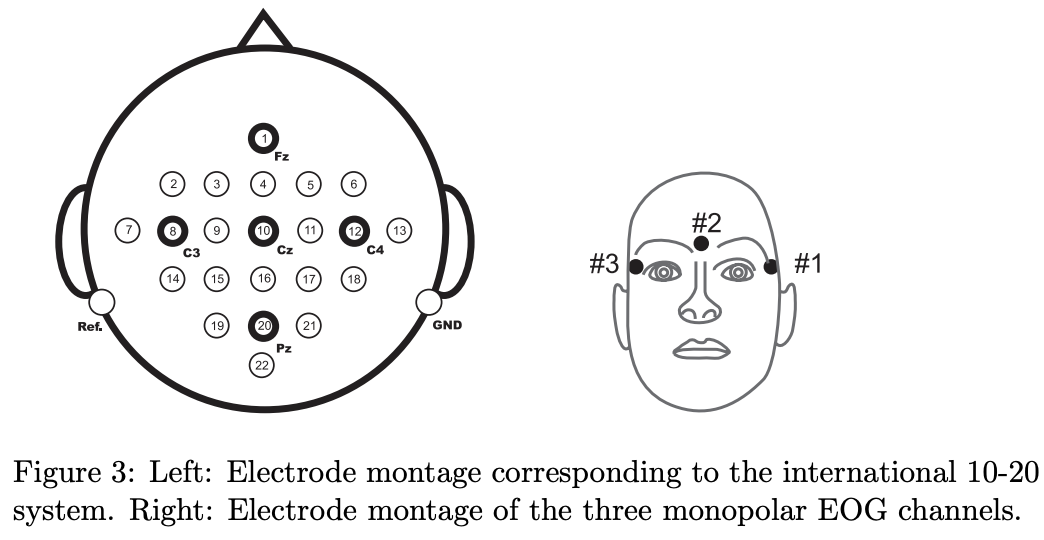

### Descripción de los Archivos de Datos

Todos los conjuntos de datos están almacenados en el **General Data Format (GDF)** para señales biomédicas, con **un archivo por sujeto y por sesión**.  

- Solo **una sesión por sujeto** contiene las **etiquetas de clase para todos los ensayos**.  
- La otra sesión se utiliza para **probar el clasificador** y evaluar su desempeño.

> Nota: Los conjuntos de evaluación estarán disponibles después de la fecha límite de la competencia, **excepto un archivo del sujeto A01**, que se proporciona como ejemplo.

### Variables en el Workspace

Después de cargar un archivo GDF, se obtendrán **dos variables principales**:

1. **`s`**: Contiene las **señales** con **25 canales**:
   - Primeros 22 canales: EEG  
   - Últimos 3 canales: EOG  

2. **`h`**: Estructura de **header** que contiene información sobre los **eventos** y la estructura temporal de los datos.

### Campos Importantes del Header

| Campo | Descripción |
|-------|------------|
| `h.EVENT.TYP` | Tipo de evento (por ejemplo, tipo de tarea o marcador de artefacto) |
| `h.EVENT.POS` | Posición del evento en **samples** |
| `h.EVENT.DUR` | Duración del evento |

- Los tipos de evento utilizados en este dataset están descritos en la **Tabla 2** (valores hexadecimales y decimal).  
- Las **etiquetas de clase** (1, 2, 3, 4 correspondientes a los tipos de evento 769, 770, 771, 772) **solo están disponibles para los datos de entrenamiento**, no para los de prueba.

### Identificación de Artefactos
- Los ensayos que contienen artefactos, según la revisión de expertos, se marcan como **tipo de evento 1023**.  
- `h.ArtifactSelection` contiene una lista de todos los ensayos:
  - `0` → ensayo limpio  
  - `1` → ensayo con artefacto


### Evaluación del Desempeño del Clasificador

Los participantes deben proporcionar una **clasificación continua** para cada **muestra**, en forma de **etiquetas de clase (1, 2, 3, 4)**.  
- Esto incluye **ensayos con etiqueta de clase** y **ensayos marcados como artefacto**.

- Se construirá una **matriz de confusión** considerando **solo los ensayos libres de artefactos** para cada punto temporal.  

- A partir de estas matrices, se calcularán:
  - **Curso temporal de la precisión (accuracy)**


## 3.2 BCI competition IV 2a: data extracting

- Primero debemos descargar el dataset en .gdf como originalmente nos viene en la pagina oficial de BCI competition: **https://www.bbci.de/competition/iv/download/index.html?agree=yes&submit=Submit**

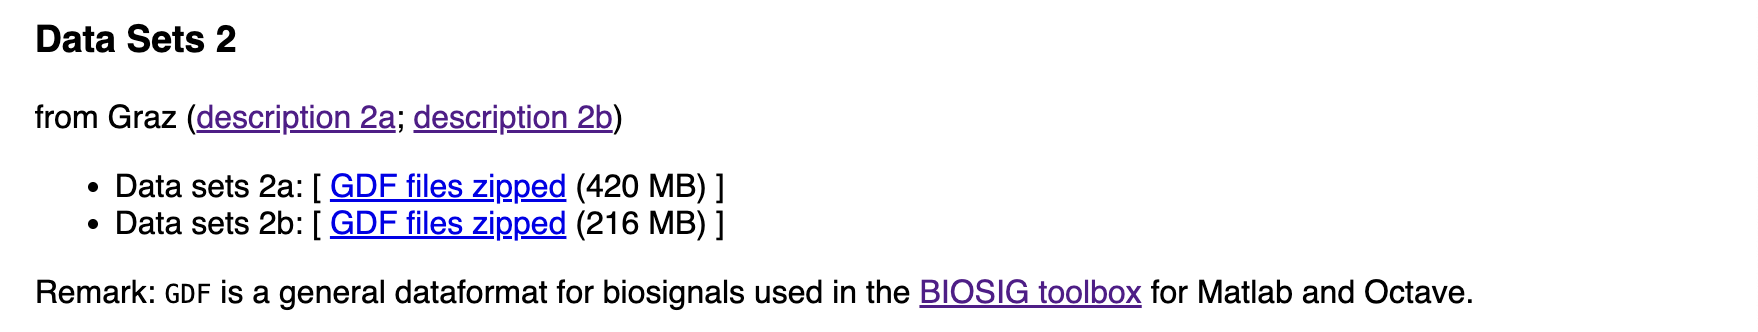

> MNE permite trabajar con este tipo de datos por lo cual es primordial tenerlo importado para este trabajo, asimismo descargamos localmente el archivo mediante el link mismo.

In [2]:
#Descarga directamente el dataset de BCI Competition IV 2a
!wget https://www.bbci.de/competition/download/competition_iv/BCICIV_2a_gdf.zip


--2025-09-03 23:52:11--  https://www.bbci.de/competition/download/competition_iv/BCICIV_2a_gdf.zip
Resolviendo www.bbci.de (www.bbci.de)... 130.149.80.149
Conectando con www.bbci.de (www.bbci.de)[130.149.80.149]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 439968864 (420M) [application/zip]
Grabando a: «BCICIV_2a_gdf.zip.1»

BCICIV_2a_gdf.zip.1 100%[===================>] 419.59M  4.15MB/s    en 1m 54s  

2025-09-03 23:54:06 (3.69 MB/s) - «BCICIV_2a_gdf.zip.1» guardado [439968864/439968864]



In [3]:
#Descomprime el archivo descargado en la MISMA CARPETA LOCAL (En mi caso /Proyect_EEG)
!mkdir -p cleaned_data

# Descomprime los datos en crudo en raw_data
!unzip BCICIV_2a_gdf.zip -d raw_data


Archive:  BCICIV_2a_gdf.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of BCICIV_2a_gdf.zip or
        BCICIV_2a_gdf.zip.zip, and cannot find BCICIV_2a_gdf.zip.ZIP, period.


>Manualmente, solo seria descargar el archivo **"BCICIV_2a_gdf.zip"** en la carpeta local en conjunto a crear otras dos llamadas "cleaned_data" y second_session_labels.

## 3.3 Importar librerias y generando el dataset

In [2]:
#Importamos todas las librerias necesarias para procesar nuestro dataste y entrenar nuestro modelo de Deep Learning

import os #Para manejo de archivos y directorios
import mne #Para procesamiento de señales EEG
import math 
import copy #Para hacer copias profundas de objetos
import gdown #Sirve para descargar archivos de Google Drive
import random 
import scipy.io #Para trabajar con archivos .mat
import numpy as np #Para operaciones numéricas
import pandas as pd 
import seaborn as sn #Para visualización de datos
import matplotlib.pyplot as plt #Para visualización de datos

# Torch
import torch 
import torch.nn as nn #Para construir redes neuronales
import torch.optim as optim #Para optimizadores
import torch.nn.functional as F #Para funciones de activación y pérdida

from torchsummary import summary #Para resumir modelos de PyTorch
from torch.autograd import Variable 
from torch.utils.data import DataLoader, TensorDataset, random_split 

# Scikit-Learn
from sklearn.feature_selection import mutual_info_classif #Para selección de características
from sklearn.metrics import confusion_matrix, accuracy_score #Para evaluar el rendimiento del modelo
from sklearn.model_selection import train_test_split #Para dividir los datos en conjuntos de entrenamiento y prueba

In [5]:
# Crear carpetas para datos limpios de las dos primeras sesiones
!mkdir -p cleaned_data/first_session
!mkdir -p cleaned_data/second_session


## 3.4 First session


En el **dataset BCI Competition IV 2a**, los archivos están nombrados según el tipo de sesión:

| Sufijo | Significado | Ejemplo | Contenido / Uso |
|--------|------------|---------|----------------|
| `T`    | Training (Entrenamiento) | `A01T.gdf`, `A02T.gdf` | Contienen todas las **etiquetas de clase** y se usan para **entrenar el modelo**. |
| `E`    | Evaluation / Test (Prueba) | `A01E.gdf`, `A02E.gdf` | No contienen todas las etiquetas de clase; se usan para **evaluar el desempeño del modelo**. |

---

> En el código:
>
> ```python
> filtered_files = [file for file in files if file.endswith('T.gdf')]
> ```
>
> se filtran solo los archivos de entrenamiento (`T.gdf`) porque **son los que contienen las clases y permiten entrenar un clasificador**.

---
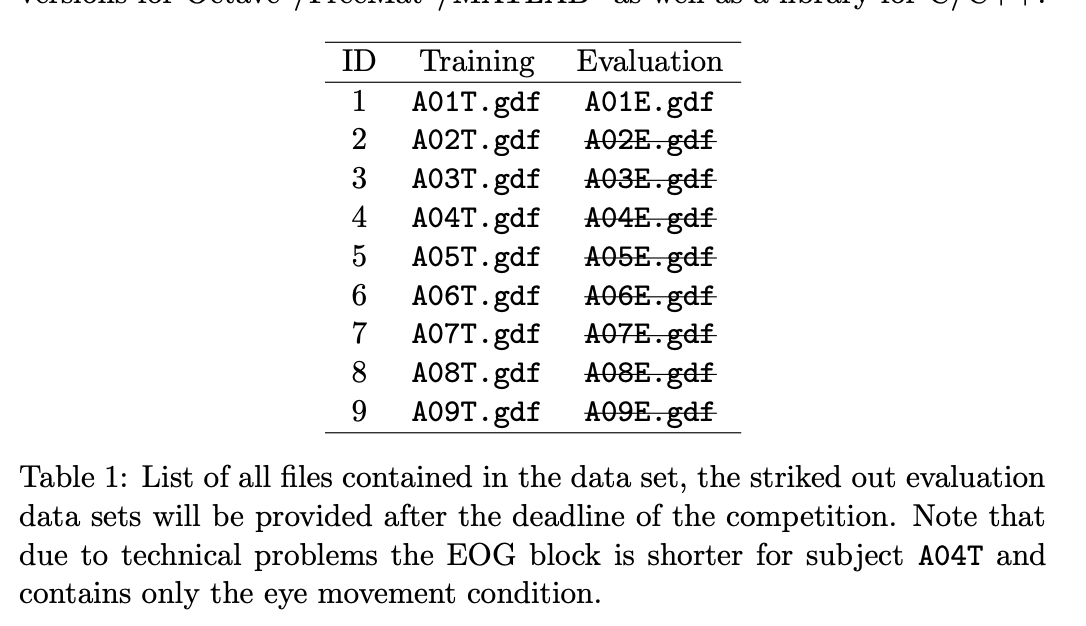
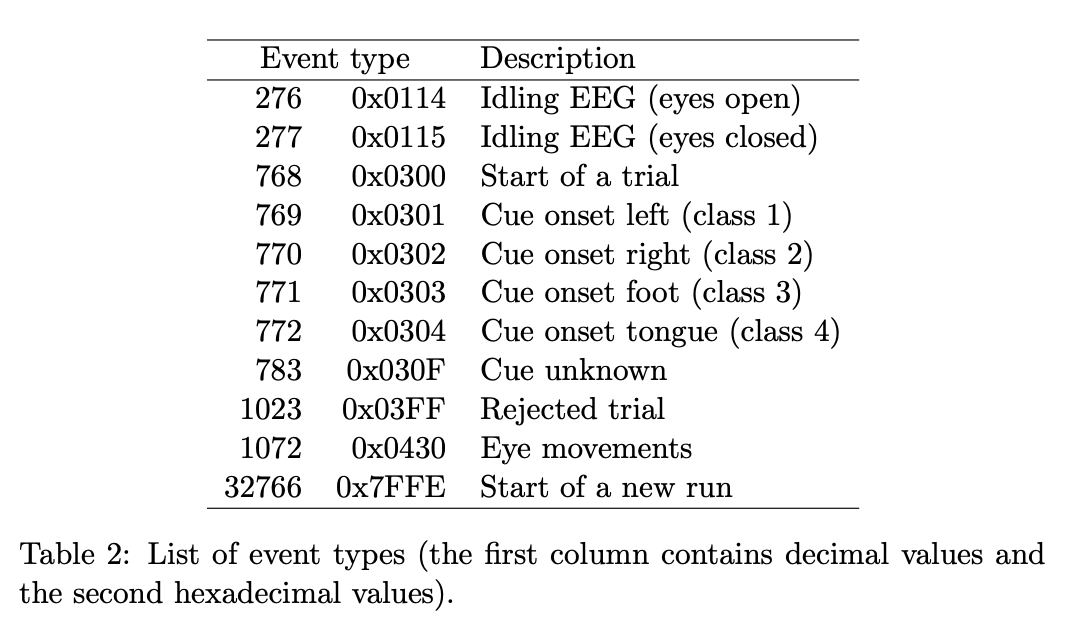

> OJO: LOS TRIALS son segmentos de la señal EEG correspondientes a un estímulo o tarea específica, es decir estan especifiados entre: h.EVENT.POS y h.EVENT.DUR.

### Estructura de un archivo GDF

- Archivo GDF
  - **s** → matriz [samples × canales]
    - EEG1 (canal)
    - EEG2 (canal)
    - ...
  - **h** → eventos
    - EVENT.POS → inicio de cada trial
    - EVENT.DUR → duración de cada trial
    - EVENT.TYP → tipo de tarea (mano izquierda, derecha, pies, lengua)


### Utilizar dataset



In [3]:
#NOTA: MNE tiene su propio sistema de logging (mensajes de información), por defecto.

# Definir las rutas de las carpetas
raw_data_folder = "raw_data/"
cleaned_data_folder = "cleaned_data/first_session/"
files = os.listdir(raw_data_folder) # devuelve una lista con los nombres de los archivos enlistados: ['A01T.gdf', 'A01E.gdf', 'A02T.gdf', ...]

# Aquí se está filtrando la lista de archivos para quedarse solo con los que terminan en .T.gdf (archivos de entrenamiento)
filtered_files = [file for file in files if file.endswith('T.gdf')]

# Inicializar una lista para almacenar los datos
raw_list = []

# Iterar sobre los archivos filtrados y cargar los datos
for file in filtered_files:
    file_path = os.path.join(raw_data_folder, file) # Construir la ruta completa del archivo (.../.../...)

    # Cargar el archivo GDF usando MNE y especificar los canales EOG
    raw = mne.io.read_raw_gdf(file_path, eog=['EOG-left', 'EOG-central', 'EOG-right'], preload=True)

    # Eliminar los canales EOG del raw data para cada 
    raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

    # High Pass Filtering 4-40 Hz
    raw.filter(l_freq=4, h_freq=40, method='iir')

    # Notch filter for Removal of Line Voltage
    raw.notch_filter(freqs=50)

    # Guardar el archivo limpio en formato .fif en la carpeta cleaned_data/first_session
    new_file_path = os.path.join(cleaned_data_folder, file[:-4] + '.fif')
    raw.save(new_file_path, overwrite=True)

    # Añadir el objeto raw a la lista
    raw_list.append(raw)

# Concatenar si hay archivos cargados
if raw_list:
    final_raw = mne.concatenate_raws(raw_list)

    # Guardar archivo concatenado en .fif
    new_file_path = os.path.join(cleaned_data_folder, 'First_Session_Subjects.fif')
    final_raw.save(new_file_path, overwrite=True)
else:
    print("No se encontraron archivos .T.gdf en la carpeta raw_data.")

Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A01T.fi

/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_49526/4268284994.py:32: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A01T.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A01T.fif
[done]
Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 678979  =      0.000 ...  2715.916 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A06T.fi

/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_49526/4268284994.py:32: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A06T.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A06T.fif
[done]
Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 681070  =      0.000 ...  2724.280 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A07T.fi

/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_49526/4268284994.py:32: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A07T.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A07T.fif
[done]
Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 675269  =      0.000 ...  2701.076 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A08T.fi

/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_49526/4268284994.py:32: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A08T.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A08T.fif
[done]
Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 600914  =      0.000 ...  2403.656 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A04T.fi

/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_49526/4268284994.py:32: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A04T.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A04T.fif
[done]
Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A05T.fi

/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_49526/4268284994.py:32: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A05T.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A05T.fif
[done]
Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A09T.fi

/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_49526/4268284994.py:32: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A09T.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A09T.fif
[done]
Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 677168  =      0.000 ...  2708.672 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A02T.fi

/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_49526/4268284994.py:32: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A02T.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A02T.fif
[done]
Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A03T.fi

/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_49526/4268284994.py:32: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A03T.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/A03T.fif
[done]
Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/First_Session_Subjects.fif
Overwriting existing file.


/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_49526/4268284994.py:43: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/First_Session_Subjects.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  final_raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/first_session/First_Session_Subjects.fif
[done]


In [4]:

#UTILIZAR ESTO PARA MOSTRAR GRAFICOS DE LAS SEÑALES EEG

#Muestra informacion del archivo guardado final
data, times = final_raw.get_data(return_times=True) # Extrae los datos (x) y los tiempos asociados (t)
print(data.shape)  # filas = canales, columnas = samples

# Nombres de los canales
print(final_raw.ch_names)

print(data[0, :10])  # primeros 10 puntos del canal 1 (EEG-Fz por ejemplo)


(22, 6005911)
['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']
[ 8.21035803e-09 -2.21021321e-08  1.09687780e-06  3.58716043e-06
  6.37650531e-06  7.63176229e-06  5.95062975e-06  1.35402784e-06
 -4.67894241e-06 -1.00480486e-05]


> Recordemos la lista de eventos, ya que lo necesitaremos para generar nuestros trials y posteriormente entrenar al modelo.


In [8]:
events = mne.events_from_annotations(final_raw)
events[1]

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


{'1023': 1,
 '1072': 2,
 '276': 3,
 '277': 4,
 '32766': 5,
 '768': 6,
 '769': 7,
 '770': 8,
 '771': 9,
 '772': 10}

Entonces, escogemos [0.s, 4s], Post Cue on set: [2s, 6s], pues: 

Cuando usas mne.Epochs(final_raw, events, tmin=0, tmax=4):
- t=0 significa el onset del evento (cue), que ocurre a los 2s absolutos, es decir el inicio de la MI.

- t=0 → t=4 en MNE = [2s–6s] absoluto en la señal real.


>Recuerda cuando cargas **"mne.io.read_raw_gdf(),"**, lee los canales y usa los registros de eventos del .gdf y marca desde ya cuando empieza el post cue en tiempo absoluto y asi:

- **1023** → Rejected trial  
- **1072** → Eye movements  
- **276** → Idling EEG (eyes open)  
- **277** → Idling EEG (eyes closed)  
- **32766** → Start of a new run  
- **768** → Start of a trial  
- **769** → Cue onset: Left (class 1 → label 0)  
- **770** → Cue onset: Right (class 2 → label 1)  
- **771** → Cue onset: Foot (class 3 → label 2)  
- **772** → Cue onset: Tongue (class 4 → label 3)  



In [9]:
# Crear epochs para los eventos de interés (7, 8, 9, 10) desde 0 a 4 segundos
epochs = mne.Epochs(final_raw, events[0], event_id=[7, 8, 9, 10], tmin=0, tmax=4, reject=None, baseline=None, preload=True)

# Extraer los datos y las etiquetas de las epochs
first_session_data = epochs.get_data(copy=True)

# Etiquetas de las primeras sesiones
first_session_labels = epochs.events[:,-1]

Not setting metadata
2592 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2592 events and 1001 original time points ...
0 bad epochs dropped


## 3.5 Second session 

🔹 ¿Por qué usar .mat en la segunda sesión?

Porque si trabajas solo con E.gdf, tendrías los segmentos de EEG de cada trial, pero no sabrías qué clase corresponde.
El .mat funciona como la "hoja de respuestas" que te da las etiquetas verdaderas para esos ensayos.

👉 En resumen:

En una competencia de BCI, quieren evaluar qué tan bien generaliza tu modelo, por ello:

- En Training (T.gdf) → te dan tanto los datos EEG como los labels (para que entrenes tu modelo).

- En Evaluation (E.gdf) → te dan solo los datos EEG sin etiquetas.

La idea es que entrenes con la sesión de entrenamiento. Luego apliques tu modelo a los datos de evaluación sin saber las etiquetas reales. Finalmente, compares tus predicciones con las etiquetas verdaderas (.mat), que en una competencia real serían usadas por los organizadores para calcular tu accuracy, basicamente **Etiquetas fuera en .mat → en evaluation, para simular un “test sin respuestas visibles”**.

> Por eso esta en la pagina de Winners o resultados, recien la evaluacion si funciono bien o no: https://www.bbci.de/competition/iv/results/index.html

In [10]:
!wget https://www.bbci.de/competition/iv/results/ds2a/true_labels.zip
!unzip true_labels.zip -d second_session_labels


--2025-09-03 23:54:52--  https://www.bbci.de/competition/iv/results/ds2a/true_labels.zip
Resolviendo www.bbci.de (www.bbci.de)... 130.149.80.149
Conectando con www.bbci.de (www.bbci.de)[130.149.80.149]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 7197 (7.0K) [application/zip]
Grabando a: «true_labels.zip.1»

true_labels.zip.1   100%[===================>]   7.03K  --.-KB/s    en 0s      

2025-09-03 23:54:53 (35.9 MB/s) - «true_labels.zip.1» guardado [7197/7197]

Archive:  true_labels.zip
replace second_session_labels/A09E.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [11]:
raw_data_folder = 'raw_data/'
cleaned_data_folder = 'cleaned_data/second_session/'
mat_folder = 'second_session_labels/'

# Filtrar archivos .mat para las etiquetas de la segunda sesión (E.mat) - extraer etiquetas
mat_files = os.listdir(mat_folder)
filtered_math_labels = [file for file in mat_files if file.endswith('E.mat')]

# Filtrar archivos .gdf para la segunda sesión (E.gdf) - extraer datos
files = os.listdir(raw_data_folder)
filtered_files = [file for file in files if file.endswith('E.gdf')]

raw_list = []
second_session_labels = np.array([])

# Iterating through filtered files
for file in filtered_files:
    file_path = os.path.join(raw_data_folder, file)

    # Reading raw data
    raw = mne.io.read_raw_gdf(file_path, eog=['EOG-left', 'EOG-central', 'EOG-right'], preload=True)
    # Droping EOG channels
    raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

    # High Pass Filtering 4-40 Hz
    raw.filter(l_freq=4, h_freq=40, method='iir')

    # Saving the modified raw data to a file with .fif suffix
    new_file_path = os.path.join(cleaned_data_folder, file[:-4] + '.fif')
    raw.save(new_file_path, overwrite=True)

    # Appending data to t he list
    raw_list.append(raw)

    # Mat files for the labels
    mat_file_name = file.replace('.gdf', '.mat')
    mat_file_path = os.path.join(mat_folder, mat_file_name)
    print(f"data:{file}, label:{mat_file_name}")

    if os.path.exists(mat_file_path):
        mat_data = scipy.io.loadmat(mat_file_path)
        class_labels = mat_data.get('classlabel', [])

        # Check if 'classlabel' key exists and is not empty
        if class_labels.size > 0:
            # Convert to a NumPy array and flatten
            class_labels_array = np.array(class_labels, dtype=int).flatten()
            # Concatenate with the existing test_labels array
            second_session_labels = np.concatenate((second_session_labels, class_labels_array))
        else:
            print(f"Warning: 'classlabel' not found or empty in {mat_file_name}.")
    else:
        print(f"Warning: {mat_file_name} not found.")

# En resumen de nuevo, concatenamos todos los raws y guardamos el archivo final para la segunda sesion
final_raw = mne.concatenate_raws(raw_list)
new_file_path = os.path.join(cleaned_data_folder, 'Second_Session_Subjects.fif')
final_raw.save(new_file_path, overwrite=True)

Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A01E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 686999  =      0.000 ...  2747.996 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A01E.fif
Overwriting existing file.


/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_11713/843461047.py:30: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A01E.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A01E.fif
[done]
data:A01E.gdf, label:A01E.mat
Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A07E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 673134  =      0.000 ...  2692.536 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A07E.fif
Overwriting existing file.


/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_11713/843461047.py:30: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A07E.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A07E.fif
[done]
data:A07E.gdf, label:A07E.mat
Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A06E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 666372  =      0.000 ...  2665.488 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A06E.fif
Overwriting existing file.


/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_11713/843461047.py:30: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A06E.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A06E.fif
[done]
data:A06E.gdf, label:A06E.mat
Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A05E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 679862  =      0.000 ...  2719.448 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A05E.fif
Overwriting existing file.


/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_11713/843461047.py:30: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A05E.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A05E.fif
[done]
data:A05E.gdf, label:A05E.mat
Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A09E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 675097  =      0.000 ...  2700.388 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A09E.fif
Overwriting existing file.


/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_11713/843461047.py:30: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A09E.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A09E.fif
[done]
data:A09E.gdf, label:A09E.mat
Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A08E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 687791  =      0.000 ...  2751.164 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A08E.fif
Overwriting existing file.


/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_11713/843461047.py:30: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A08E.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A08E.fif
[done]
data:A08E.gdf, label:A08E.mat
Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A04E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 660046  =      0.000 ...  2640.184 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB



/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_11713/843461047.py:30: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A04E.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A04E.fif
Overwriting existing file.
Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A04E.fif
[done]
data:A04E.gdf, label:A04E.mat
Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A03E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 648774  =      0.000 ...  2595.096 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A03E.fif
Overwriting existing file.


/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_11713/843461047.py:30: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A03E.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A03E.fif
[done]
data:A03E.gdf, label:A03E.mat
Extracting EDF parameters from /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/raw_data/A02E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...
Reading 0 ... 662665  =      0.000 ...  2650.660 secs...


/opt/anaconda3/envs/dl_env/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 40.00 Hz: -6.02, -6.02 dB

Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A02E.fif
Overwriting existing file.


/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_11713/843461047.py:30: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A02E.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/A02E.fif
[done]
data:A02E.gdf, label:A02E.mat
Overwriting existing file.
Writing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/Second_Session_Subjects.fif
Overwriting existing file.


/var/folders/7g/x1f_2rpx6slblmnprfxv_0yr0000gn/T/ipykernel_11713/843461047.py:58: RuntimeWarning: This filename (/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/Second_Session_Subjects.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  final_raw.save(new_file_path, overwrite=True)


Closing /Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/Second_Session_Subjects.fif
[done]


[PosixPath('/Users/miguel_05/Desktop/Programacion/ISB/Proyect_EEG/cleaned_data/second_session/Second_Session_Subjects.fif')]

In [12]:

#Muestra informacion del archivo guardado final
data, times = final_raw.get_data(return_times=True) # Extrae los datos (x) y los tiempos asociados (t)
print(data.shape)  # filas = canales, columnas = samples

# Nombres de los canales
print(final_raw.ch_names)

print(data[0, :10])  # primeros 10 puntos del canal 1 (EEG-Fz por ejemplo)

# Ver el tipo de dato de 'data'
print(type(data))

# Si es un array de NumPy, puedes inspeccionar más detalles
if isinstance(data, np.ndarray):
    print("Dimensiones:", data.ndim)  # Número de dimensiones
    print("Forma:", data.shape)      # Forma del array
    print("Tipo de datos:", data.dtype)  # Tipo de datos de los elementos

(22, 6040749)
['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16']
[-8.35860860e-09  8.55300001e-08  1.19900450e-07 -2.36231023e-07
 -1.31789814e-06 -2.83715017e-06 -3.70414534e-06 -2.80595536e-06
 -1.81075273e-07  2.63706757e-06]
<class 'numpy.ndarray'>
Dimensiones: 2
Forma: (22, 6040749)
Tipo de datos: float64


List of the Events

- **1023** → 1. Rejected trial  
- **1072** → 2. Eye movements  
- **276** → 3. Idling EEG (eyes open)  
- **277** → 4. Idling EEG (eyes closed)  
- **32766** → 5. Start of a new run  
- **768** → 6. Start of a trial  
- **783** → 7. Cue unknown  


In [13]:
# Extraer eventos y crear epochs para la segunda sesión
events = mne.events_from_annotations(final_raw)
events[1]

# Crear epochs para el evento de interés (7) desde 0 a 4 segundos
epochs = mne.Epochs(final_raw, events[0], event_id=7, tmin=0, tmax=4, reject=None, baseline=None, preload=None)
second_session_data = epochs.get_data(copy=True)

print("\n Second Session Dataset shape:",second_session_data.shape)


Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '783']
Not setting metadata
2592 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2592 events and 1001 original time points ...
0 bad epochs dropped

 Second Session Dataset shape: (2592, 22, 1001)


# 4. Training y Evaluation model

## 4.1 Estructura y preparación de datos



### Explicación del Preprocesamiento y Preparación de Datos

1. **Selección del dispositivo de cómputo**  
   Se define si el entrenamiento se realizará en GPU (`cuda`) o en CPU, dependiendo de la disponibilidad del hardware.

2. **Función de pérdida**  
   Se utiliza `CrossEntropyLoss`, que es adecuada para problemas de clasificación multiclase.

3. **Normalización de etiquetas**  
   Se ajustan las etiquetas (`labels`) para que comiencen desde 0.  
   Ejemplo: si originalmente son `[1, 2, 3, 4]`, se transforman en `[0, 1, 2, 3]`.

In [1]:
# Establecemos el dispositivo para PyTorch (GPU si está disponible, de lo contrario CPU)
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define la funcion de perdida 
criterion = nn.CrossEntropyLoss()

# Normalizamos las etiquetas (Y) para que comiencen desde 0 (0 1 2 3 en vez de 1 2 3 4)
y_train = first_session_labels - np.min(first_session_labels) 
y_test = second_session_labels - np.min(second_session_labels)

NameError: name 'torch' is not defined

4. **Normalización de características (features)**  

🔹 ¿Qué significa “normalizar características”?

Cuando tienes datos de entrada (ECG, EEG, imágenes, etc.), cada valor puede estar en escalas muy diferentes:

- Unos pueden estar entre –100 y 100

- Otros entre 0 y 1

- Otros mucho más grandes.

👉 Si entrenas una red neuronal así, el modelo se “desorienta”, porque algunos parámetros dominan más que otros.

La fórmula es:

$$
X_{norm} = \frac{X - \mu}{\sigma}
$$

Donde:

- $X$ = tus datos originales.  
- $\mu$ = media de los datos.  
- $\sigma$ = desviación estándar.  

Esto convierte los datos en una distribución con:  

- Media = $0$  
- Desviación estándar = $1$  

- Se aplica **z-score normalization** a los datos de entrada   (ECG u otro tipo de señal).  
   
   Esto asegura que cada conjunto de datos tenga media 0 y desviación estándar 1, lo que ayuda a estabilizar y acelerar el entrenamiento de la red.


In [17]:
# Normalizamos los datos (Z-score normalization)
X_first_session = (first_session_data - np.mean(first_session_data)) / np.std(first_session_data)
X_second_session = (second_session_data - np.mean(second_session_data)) / np.std(second_session_data)

# Concatenamos los datos y las etiquetas de ambas sesiones
X = np.concatenate((X_first_session, X_second_session))
y = np.concatenate((y_train, y_test))

# Mostramos las formas de los datos y las etiquetas
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (5184, 22, 1001)
Shape of y: (5184,)



5. **División en entrenamiento y prueba**  
   Se separan los datos en **90% para entrenamiento** y **10% para prueba**, manteniendo la proporción de clases mediante `stratify=y`.

6. **Conversión a tensores de PyTorch**  
   - `X_train` y `X_test` se convierten a tensores de tipo `FloatTensor` y se les añade una dimensión extra con `unsqueeze(1)` (generalmente necesaria para modelos que esperan entrada con canal explícito, como en CNNs).  

      🔹 ¿Qué hace unsqueeze?

      unsqueeze(dim) agrega una nueva dimensión de tamaño 1 en la posición dim.
      
      Es útil cuando quieres adaptar el shape de un tensor para que coincida con lo que espera una red neuronal o una función.

   - `y_train` y `y_test` se convierten a tensores de tipo `LongTensor` (requerido por `CrossEntropyLoss`).

In [18]:
# Dividimos los datos en conjuntos de entrenamiento y prueba (90% entrenamiento, 10% prueba)    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Convertimos los datos (x) a tensores de PyTorch y los movemos al dispositivo adecuado (CPU o GPU)
X_train = torch.Tensor(X_train).unsqueeze(1).to(device)
X_test = torch.Tensor(X_test).unsqueeze(1).to(device)

# Convertimos las etiquetas (y) a tensores de PyTorch y los movemos al dispositivo adecuado (CPU o GPU)
y_train = torch.LongTensor(y_train).to(device)
y_test = torch.LongTensor(y_test).to(device)

8. **Creación de datasets de PyTorch**  
   Se construyen objetos `TensorDataset` para el conjunto de entrenamiento y prueba, que permiten usarlos directamente con un `DataLoader`.

9. **Impresión de tamaños de los tensores**  
   Se muestran las dimensiones finales de los datos de entrenamiento y prueba, tanto de las características (`X`) como de las etiquetas (`y`).

In [20]:
# Creamos datasets de PyTorch para entrenamiento y prueba

#Es una clase de torch.utils.data
#  que permite empaquetar varios tensores 
# juntos como si fueran un dataset.

#Lo importante:
# - Cada tensor debe tener la misma primera dimensión (número de muestras).
# - Puedes acceder a los datos usando índices, lo que facilita la iteración sobre el dataset.

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

print("Size of X_train:", X_train.size())
print("Size of X_test:", X_test.size())
print("Size of y_train:", y_train.size())
print("Size of y_test:", y_test.size())


Size of X_train: torch.Size([4665, 1, 22, 1001])
Size of X_test: torch.Size([519, 1, 22, 1001])
Size of y_train: torch.Size([4665])
Size of y_test: torch.Size([519])


## 4.2 Clase de entrenamiento


🔹 Qué hace tu clase

Es una clase para entrenar modelos en PyTorch de manera ordenada.

La idea es encapsular todo el proceso: mover el modelo a GPU/CPU, definir la función de pérdida, optimizador, loop de entrenamiento, guardar métricas y finalmente exportar el modelo entrenado.


In [21]:
#TrainModel es una clase que encapsula el proceso de 
#entrenamiento de un modelo de red neuronal utilizando PyTorch.

class TrainModel():
    def __init__(self,):
        # Establece el dispositivo para PyTorch (GPU si está disponible, de lo contrario CPU)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Método para entrenar el modelo

    # Batch size: número de muestras que se procesan antes de actualizar el modelo
    # Epochs: número de veces que el modelo verá todo el conjunto de datos de entrenamiento

    def train_model(self, model, train_dataset, learning_rate=0.001, batch_size=64, epochs=500):
        model = model.to(self.device) # Mover el modelo al dispositivo adecuado (CPU o GPU)
        criterion = nn.CrossEntropyLoss()

        # Definir el optimizador Adam 
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        
        # Variables para seguimiento del rendimiento
        highest_train_accuracy = 0.0

        # Bucle de entrenamiento
        for epoch in range(epochs):
            model.train() # train mode - activa dropout y batchnorm si están presentes
            running_loss = 0.0
            correct = 0
            total = 0

            # Iterar sobre los lotes de datos
            for inputs, labels in train_loader:

                # Mover los datos al dispositivo adecuado (CPU o GPU)
                inputs = inputs.to(self.device)
                labels = labels.to(self.device)
                
                # Procesos de forward y backward pass 
                # y actualización de pesos del modelo
                optimizer.zero_grad() # Limpiar los gradientes acumulados
                
                #Forward pass: pasamos los datos por el modelo
                outputs = model(inputs) 
                loss = criterion(outputs, labels)

                #Backward pass: aplicamos backpropagation
                loss.backward()
                optimizer.step()

                # Estadísticas de pérdida y precisión
                running_loss += loss.item() * inputs.size(0) # Suma la pérdida del lote actual
                _, predicted = torch.max(outputs, 1) # Obtiene las predicciones del modelo
                
                # Cuenta el número total de etiquetas y las predicciones correctas
                total += labels.size(0) 
                correct += (predicted == labels).sum().item()

            epoch_loss = running_loss / len(train_loader.dataset)
            epoch_accuracy = correct / total

            # Actualiza la mejor precisión de entrenamiento si es necesario
            if epoch_accuracy > highest_train_accuracy:
                highest_train_accuracy = epoch_accuracy
                
            print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {(epoch_accuracy*100):.2f}%")
        
        # Estadísticas finales después del entrenamiento
        average_loss = running_loss / len(train_loader.dataset)
        print("Average Loss:", average_loss)
        print("Highest Train Accuracy:", highest_train_accuracy)

        # Saving model
        torch.save(model.state_dict(), 'eegnet_model.pth')
        return model

## 4.3 Clase de evaluación de modelo

La clase `EvalModel` permite **evaluar un modelo entrenado** en PyTorch y obtener métricas clave de desempeño.

---

### Proceso de Evaluación

1. **Inicialización**
   - Carga el modelo entrenado.
   - Lo envía a `cuda` (GPU) si está disponible, o a `cpu`.

2. **Test del modelo (`test_model`)**
   - Pone el modelo en modo evaluación con `model.eval()`.
   - Recorre el dataset de prueba con un `DataLoader`.
   - Realiza un **forward pass** sobre cada muestra.
   - Obtiene la predicción con `torch.max(outputs, 1)`.
   - Calcula el **accuracy**:
     \[
     \text{Accuracy} = \frac{\text{Predicciones correctas}}{\text{Total de muestras}} \times 100
     \]

3. **Matriz de confusión (`plot_confusion_matrix`)**
   - Compara etiquetas reales (`y_true`) con predicciones (`y_pred`).
   - Genera la **matriz de confusión normalizada**.
   - Visualiza los resultados en un **heatmap** con seaborn.
   - Permite identificar en qué clases el modelo acierta o falla más.

---
### Resumen

El modelo **NO aprende**, solo se mide su desempeño.

### 🔹 Se usa:
- **Forward pass** → predicción (igual que en entrenamiento).  
- No se hace **backward** ni actualización de pesos.  
- Se activa `model.eval()` → desactiva capas que funcionan diferente en entrenamiento (ej. *dropout*, *batchnorm*).  
- Se usa `torch.no_grad()` → no calcula gradientes (más rápido y menos memoria).  
- Solo acumula métricas como **accuracy** y la **matriz de confusión**.  

🔑 En resumen:

Entrenamiento = forward pass + backward pass + optimización.

Evaluación = solo forward pass (sin aprendizaje), para medir qué tan bien generaliza el modelo en datos nuevos.

In [1]:
# EvalModel es una clase que encapsula el proceso de evaluación de un modelo de red neuronal utilizando PyTorch.
class EvalModel():
    def __init__(self, model):
        self.model = model.to(device)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Método para probar el modelo en un conjunto de datos de prueba y calcular la precisión de clasificación
    def test_model(self, test_dataset):

        # Poner el modelo en modo de evaluación
        self.model.eval() # Desactiva dropout y batch normalization si están presentes  
        correct = 0
        total = 0

        # Crear un DataLoader para el conjunto de datos de prueba
        test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

        # Desactivar el cálculo de gradientes para la evaluación
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs = inputs.to(self.device)
                labels = labels.to(self.device)
                outputs = self.model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        # Calcular y mostrar la precisión
        accuracy = (correct / total) * 100
        print("/------------------------------/")
        print(f"Test Accuracy: {accuracy:.2f}%")
        print("/------------------------------/")
        return accuracy

    #
    def plot_confusion_matrix(self, test_dataset, classes):
        self.model.eval()
        y_pred = []
        y_true = []
        test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

        with torch.no_grad():
            #from: https://github.com/github-copilot/code_referencing?cursor=39e277800e17a96819fae3ffbe2dca5e&editor=vscode
            for entradas, etiquetas in test_loader:
                entradas = entradas.to(self.device)
                etiquetas = etiquetas.to(self.device)

                salidas = self.model(entradas)
                _, predicho = torch.max(salidas.data, 1)

                y_pred.append(predicho.item())
                y_true.append(etiquetas.item())
        
        # Calcular la matriz de confusión
        cf_matrix = confusion_matrix(y_true, y_pred)
        cf_matrix = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

        df_cm = pd.DataFrame(cf_matrix, index=classes, columns=classes)

        # Visualizar la matriz de confusión usando seaborn
        plt.figure(figsize=(10, 7))
        sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='.2f')
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.savefig('confusion_matrix_model.png')
        plt.show()

## 4.4 Modelo de EEGnet



🔹 **Parámetros de entrada**

- `chans=22` → número de canales de EEG.  
- `classes=4` → cantidad de clases a predecir (ej. 4 tipos de imaginación motora).  
- `time_points=1001` → longitud temporal de la señal por canal.  
- `temp_kernel=32` → tamaño del kernel para convoluciones temporales.  
- `f1=16, f2=32` → número de filtros de convolución (capacidad del modelo).  
- `d=2` → multiplicador de filtros para convolución *depthwise*.  
- `pk1=8, pk2=16` → tamaños de los **poolings** para reducción de dimensiones.  
- `dropout_rate=0.5` → probabilidad de apagar neuronas (regularización).  
- `max_norm1, max_norm2` → restricciones para los pesos (para evitar sobreajuste).  

Este modelo está diseñado específicamente para EEG:

- Block1 aprende patrones temporales,
- Block2 aprende patrones espaciales entre canales,
- Block3 refina la información con separable convolutions,

Finalmente clasifica en las classes.



### 1. Input: Datos EEG
- **Dimensiones:** `(C, T)`  
  - `C` = número de canales/electrodos (ej. 22)  
  - `T` = número de puntos de tiempo por trial (ej. 256 muestras)  
- **Señal:** Cruza el tiempo y los electrodos. Cada canal es como un sensor que registra la actividad cerebral.
- **Formato:** Raw EEG (no filtrado en EEGNet, aunque algunos preprocesamientos básicos como normalización son útiles).
---
- `F1`: número de filtros temporales (detecta ritmos EEG)  
- `D`: número de filtros espaciales por filtro temporal (localización)  
- `F2`: número de filtros pointwise en Bloque 2 (combinación de mapas)  
  - `F2 < D*F1` → representación comprimida  
  - `F2 > D*F1` → representación sobredimensionada  
- Ejemplo: `EEGNet-4,2` → 4 filtros temporales × 2 filtros espaciales → 8 mapas de características en Bloque 1
---

### 3. Bloque 2: Convolución Separable

**Objetivo:** Resumir la información temporal y combinar mapas de características.

1. **Depthwise temporal `(1,16)`**
   - Resume 500 ms de EEG para cada mapa individual.
   - Output: `F1*D` mapas resumidos.

2. **Pointwise convolution `(F2,1x1)`**
   - Combina los mapas resumidos para crear nuevas representaciones.  
   - Output: `F2` mapas combinados.

3. **Average Pooling `(1,8)`**
   - Reduce aún más las dimensiones temporales.  
   - Output: `F2, T''` (T'' << T)

---

### 4. Bloque 3: Clasificación

- Las características procesadas se pasan **directamente a softmax** con N unidades.  
  - N = número de clases (ej. izquierda, derecha, pies, lengua → N=4)
- No se utiliza capa densa intermedia: menos parámetros, más simple.

**Output final:**  
- Probabilidades de cada clase para cada trial EEG.  
- Ejemplo: `[0.05, 0.70, 0.10, 0.15]` → clase más probable = 2 (derecha).

---

In [23]:
# Definición del modelo EEGNet en PyTorch
class EEGNetModel(nn.Module): # EEGNET-8,2
    def __init__(self, chans=22, classes=4, time_points=1001, temp_kernel=32,
                 f1=16, f2=32, d=2, pk1=8, pk2=16, dropout_rate=0.5, max_norm1=1, max_norm2=0.25):
        
        super(EEGNetModel, self).__init__()
        # Calculating FC input features
        linear_size = (time_points//(pk1*pk2))*f2

        # Temporal Filters
        self.block1 = nn.Sequential(
            nn.Conv2d(1, f1, (1, temp_kernel), padding='same', bias=False),
            nn.BatchNorm2d(f1),
        )
        # Spatial Filters
        self.block2 = nn.Sequential(
            nn.Conv2d(f1, d * f1, (chans, 1), groups=f1, bias=False), # Depthwise Conv
            nn.BatchNorm2d(d * f1),
            nn.ELU(),
            nn.AvgPool2d((1, pk1)),
            nn.Dropout(dropout_rate)
        )

        # Separable Conv
        self.block3 = nn.Sequential(
            nn.Conv2d(d * f1, f2, (1, 16),  groups=f2, bias=False, padding='same'), # Separable Conv
            nn.Conv2d(f2, f2, kernel_size=1, bias=False), # Pointwise Conv
            nn.BatchNorm2d(f2),
            nn.ELU(),
            nn.AvgPool2d((1, pk2)),
            nn.Dropout(dropout_rate)
        )
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(linear_size, classes)

        # Apply max_norm constraint to the depthwise layer in block2
        self._apply_max_norm(self.block2[0], max_norm1)

        # Apply max_norm constraint to the linear layer
        self._apply_max_norm(self.fc, max_norm2)

    # Función para aplicar la restricción de norma máxima a los pesos de una capa
    # Esto ayuda a prevenir el sobreajuste y mejora la generalización del modelo
    # En resumen: aplica restricciones a los pesos para que no crezcan demasiado.

    def _apply_max_norm(self, layer, max_norm):
        for name, param in layer.named_parameters():
            if 'weight' in name:
                param.data = torch.renorm(param.data, p=2, dim=0, maxnorm=max_norm)

    # Definición del paso hacia adelante (forward pass) del modelo.
    # Aquí es donde se define cómo los datos fluyen a través de las diferentes capas del modelo.
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.flatten(x)
        x = self.fc(x)

        return x
    


## 4.5 Entrenamiento y resumen



In [24]:
#Estructura del modelo EEGNet
input_size = (1, 22, 1001)
eegnet_model = EEGNetModel().to(device)
summary(eegnet_model, input_size)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 16, 22, 1001]        --
|    └─Conv2d: 2-1                       [-1, 16, 22, 1001]        512
|    └─BatchNorm2d: 2-2                  [-1, 16, 22, 1001]        32
├─Sequential: 1-2                        [-1, 32, 1, 125]          --
|    └─Conv2d: 2-3                       [-1, 32, 1, 1001]         704
|    └─BatchNorm2d: 2-4                  [-1, 32, 1, 1001]         64
|    └─ELU: 2-5                          [-1, 32, 1, 1001]         --
|    └─AvgPool2d: 2-6                    [-1, 32, 1, 125]          --
|    └─Dropout: 2-7                      [-1, 32, 1, 125]          --
├─Sequential: 1-3                        [-1, 32, 1, 7]            --
|    └─Conv2d: 2-8                       [-1, 32, 1, 125]          512
|    └─Conv2d: 2-9                       [-1, 32, 1, 125]          1,024
|    └─BatchNorm2d: 2-10                 [-1, 32, 1, 125]          64
|    └─EL

/opt/anaconda3/envs/dl_env/lib/python3.11/site-packages/torch/nn/modules/conv.py:543: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Convolution.cpp:1028.)
  return F.conv2d(


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 16, 22, 1001]        --
|    └─Conv2d: 2-1                       [-1, 16, 22, 1001]        512
|    └─BatchNorm2d: 2-2                  [-1, 16, 22, 1001]        32
├─Sequential: 1-2                        [-1, 32, 1, 125]          --
|    └─Conv2d: 2-3                       [-1, 32, 1, 1001]         704
|    └─BatchNorm2d: 2-4                  [-1, 32, 1, 1001]         64
|    └─ELU: 2-5                          [-1, 32, 1, 1001]         --
|    └─AvgPool2d: 2-6                    [-1, 32, 1, 125]          --
|    └─Dropout: 2-7                      [-1, 32, 1, 125]          --
├─Sequential: 1-3                        [-1, 32, 1, 7]            --
|    └─Conv2d: 2-8                       [-1, 32, 1, 125]          512
|    └─Conv2d: 2-9                       [-1, 32, 1, 125]          1,024
|    └─BatchNorm2d: 2-10                 [-1, 32, 1, 125]          64
|    └─EL

In [26]:
# Crear una instancia del modelo EEGNet y moverlo al dispositivo adecuado (CPU o GPU)
eegnet_model = EEGNetModel().to(device)

# Training Hyperparameters
EPOCHS = 250
BATCH_SIZE = 64
LEARNING_RATE = 0.001
trainer = TrainModel() # Instancia de la clase TrainModel

# Entrenar el modelo EEGNet y guardar los pesos entrenados
trained_eegnet_model = trainer.train_model(eegnet_model, train_dataset, learning_rate=LEARNING_RATE,batch_size=BATCH_SIZE, epochs=EPOCHS)

# Evaluar el modelo entrenado usando el conjunto de datos de prueba
torch.save(trained_eegnet_model.state_dict(), 'eegnet_model.pth')

Epoch 1/250, Loss: 1.3776, Accuracy: 27.97%
Epoch 2/250, Loss: 1.3467, Accuracy: 33.46%
Epoch 3/250, Loss: 1.3104, Accuracy: 36.74%
Epoch 4/250, Loss: 1.2766, Accuracy: 39.68%
Epoch 5/250, Loss: 1.2439, Accuracy: 41.80%
Epoch 6/250, Loss: 1.2137, Accuracy: 44.09%
Epoch 7/250, Loss: 1.2015, Accuracy: 44.61%
Epoch 8/250, Loss: 1.1942, Accuracy: 45.72%
Epoch 9/250, Loss: 1.1885, Accuracy: 46.56%
Epoch 10/250, Loss: 1.1727, Accuracy: 46.77%
Epoch 11/250, Loss: 1.1737, Accuracy: 46.28%
Epoch 12/250, Loss: 1.1534, Accuracy: 47.48%
Epoch 13/250, Loss: 1.1442, Accuracy: 48.10%
Epoch 14/250, Loss: 1.1362, Accuracy: 48.92%
Epoch 15/250, Loss: 1.1282, Accuracy: 49.43%
Epoch 16/250, Loss: 1.1310, Accuracy: 49.75%
Epoch 17/250, Loss: 1.1190, Accuracy: 50.23%
Epoch 18/250, Loss: 1.1182, Accuracy: 50.38%
Epoch 19/250, Loss: 1.1047, Accuracy: 50.76%
Epoch 20/250, Loss: 1.1038, Accuracy: 51.15%
Epoch 21/250, Loss: 1.0986, Accuracy: 51.23%
Epoch 22/250, Loss: 1.0906, Accuracy: 51.30%
Epoch 23/250, Loss:

/------------------------------/
Test Accuracy: 67.44%
/------------------------------/


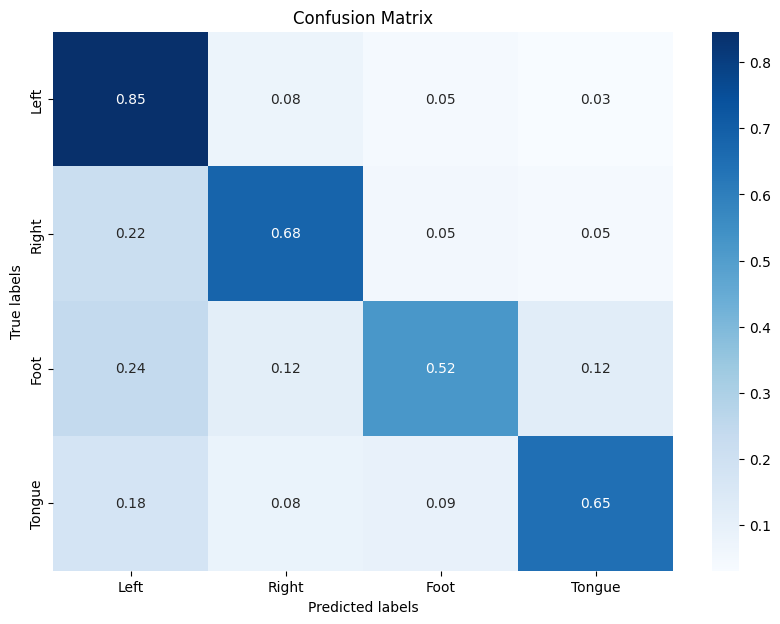

In [29]:
classes_list = ['Left', 'Right', 'Foot', 'Tongue']

# Evaluar el modelo entrenado
eval_model = EvalModel(trained_eegnet_model)
test_accuracy = eval_model.test_model(test_dataset)
eval_model.plot_confusion_matrix(test_dataset, classes_list)
